In [1]:
# 这部分Python工作诣在解决算法准确率计算和算法特点研究的工作，是在原有推荐算法基础上的补充内容
# 第一部分 引用库
import time
import pandas as pd
import numpy as np
import re
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn import metrics
import copy

In [2]:
# 第二部分 探究测试集中的用户在推荐算法下的推荐咨询和浏览咨询的关系
# 第二部分的第一节：打开测试集并分开用户ID与浏览咨询ID
test = open('test.txt','r')                             # 打开测试集
recording = [line for line in test]                    # test的每一行作为字符串构成list
user_in_test = []
useritem_list_in_test = []                              # 其中子列表为test中每个用户的记录
for i in range(len(recording)):
    uid = re.compile(',').split(recording[i])[0]        # 每一行逗号分隔两部分的第一部分——即用户id
    user_in_test.append(uid)                            # 在测试集中的用户列表添加上这个id
    item_str = re.compile(',').split(recording[i])[1]   # 每一行逗号分隔两部分的第二部分——即用户浏览的新闻编号
    item_str = re.compile('\n').sub('',item_str)        # 去掉'\n'号，只有最后才有这个
    user_items = re.compile(' ').split(item_str)        # 按照空格划分，形成真正的浏览新闻编号list
    useritem_list_in_test.append(user_items)            # 在测试集中的用户浏览列表添加这部分编号，以list的形式添加，与用户对应
print(user_in_test)                                     # 输出所有测试集中的用户id
print(useritem_list_in_test)                            # 输出所有测试集中的用户浏览新闻的编号

['16911541', '16911540', '16911543', '14979573', '16911547', '14979577', '6066817', '378468', '16158999', '16158998', '378465', '13822909', '13822908', '11414716', '2008915', '16812694', '11414713', '16812692', '2008911', '16812690', '12182381', '6158960', '16037549', '12135833', '12135830', '16037542', '4630642', '1902203', '14170946', '15025477', '14170943', '3784601', '15025471', '4541270', '4541273', '14170948', '13598461', '9920863', '13598464', '4304457', '11037554', '11037555', '9671977', '12812121', '1698376', '2592648', '13707896', '13707895', '16460038', '5605850', '5388357', '16429165', '7384770', '16429163', '16679415', '16429161', '14177446', '14177445', '12012662', '16201709', '12012666', '12012665', '16354171', '16354170', '16354173', '16201707', '16201706', '16354176', '10588848', '14362456', '14362451', '14362450', '14362452', '14888757', '5371243', '14888754', '14362459', '13163845', '5371247', '14888750', '3333282', '15162766', '16158990', '10290629', '9495420', '475

In [4]:
# 第二部分的第二节：打开推荐集并分开用户ID与浏览咨询ID
file = open("similar_result_from_test_3_0.5_train0.5_100.txt",'r')    # 打开推荐咨询
recording2 = [line for line in file]
user_in_all = []
useritem_list_in_all = []
for i in range(len(recording2)):
    uid = re.compile(',').split(recording2[i])[0]                     # 每一行逗号分隔两部分的第一部分——即用户id
    user_in_all.append(uid)                                           # 在推荐集中的用户列表添加上这个id
    item_str = re.compile(',').split(recording2[i])[1]                # 每一行逗号分隔两部分的第二部分——即用户浏览的新闻编号
    item_str = re.compile('\n').sub('',item_str)                      # 去掉'\n'号，只有最后才有这个
    user_items = re.compile(' ').split(item_str)                      # 按照空格划分，形成真正的浏览新闻编号list
    useritem_list_in_all.append(user_items)                           # 在推荐集中的用户浏览列表添加这部分编号，以list的形式添加，与用户对应
print(user_in_all)                                     
print(useritem_list_in_all)                            

['15775343', '14621284', '11022650', '2539552', '5445998', '10915379', '16083308', '2758315', '2758317', '16983589', '6505788', '7476754', '2758318', '10257598', '15004024', '11956044', '15004020', '8846346', '6839310', '7893483', '8846343', '16426655', '16426656', '16426657', '15924795', '16426653', '13111273', '13111270', '324701', '12180327', '11870754', '11870756', '16628405', '11329283', '1736494', '1736497', '16520989', '865644022442890', '15103080', '15103081', '15103082', '16520983', '3990569', '12814585', '12814584', '12614051', '12614056', '4087525', '14603755', '4471800', '3726670', '14576291', '14576293', '13307019', '13307018', '13307013', '13414152', '13307011', '7855576', '1394812', '10459242', '9822963', '10459244', '10459248', '13311468', '15759818', '13311461', '5619193', '13311465', '9641539', '15082987', '16612847', '4117606', '14544200', '9535474', '5884076', '4117601', '14224836', '16103912', '16976864', '12402005', '15122859', '11777416', '16976860', '16976863', 

In [5]:
# 第二部分的第三节：检索推荐中测试集中的用户的推荐咨询ID
user_in_test_recommend_list = list(map(lambda user:useritem_list_in_all[user_in_all.index(user)],user_in_test))
# 第二部分失败，测试集中的用户都不在candidate中存在，那这个测试集有什么用？？？？
# 测试集提供了某种参考用户的指标，但是聚类的作用仅仅在700多个人上，这有任何意义吗？

ValueError: '16911541' is not in list

In [49]:
# 第三部分 因为第二部分失败了，所以这一部分探究test与train的关系
# 第三部分的第一节 探究train中的用户是否是30000个，以及test的用户是否存在和分布的时间
train = pd.read_csv('train.csv')
user_list = list(set(train['user_id']))
print(len(user_list))
# 说明train中就没有test的用户
user_list.extend(user_in_test)
print(len(set(user_list)))

28501
30000


In [33]:
# 第三部分的第二节 进一步探究test用户的浏览时间，根据算法细节，test用户的浏览时间应该是1天，这里从量级做进一步验证
print(len(list(train['user_id']))/28501)
test_view_num = [len(sub_item) for sub_item in useritem_list_in_test]
print(sum(test_view_num)/1499)
# for i in range(1499):
#     print(len(set(useritem_list_in_test[i]))-len(useritem_list_in_test[i]))
# 上面这个循环验证test中的每个用户记录的新闻编号没有重复（即使实际可能有重复浏览）


# unique_num=0
# test_num=1000
# for i in range(test_num):
#     user=user_in_all[i]
#     user_train=train.ix[train.user_id==user]
#     user_train_item=list(user_train['item_id'])
#     unique_num=len(set(user_train_item))+unique_num
# print(unique_num/test_num)
# 上面这个循环用极大似然估计了平均每个用户在3天的不重复新闻浏览数量

114.8044980877864
20.735156771180787


i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


59.894


In [37]:
# 第三部分的第三节 探究train数据的时间戳范围
time_stick = list(train['action_time'])
print((max(time_stick)-min(time_stick))/3600) # 这里时间戳似乎是完全正向排布的
print(time_stick[0])
print(time_stick[-1])

71.99972222222222
1487174400
1487433599


In [42]:
# 第三部分的第四节 test与train的用户真的完全无关吗？
candidate = open('candidate.txt','r')
user_list = [line for line in candidate]
for i in range(len(user_list)):
    user_list[i] = re.compile('\n').sub('',user_list[i])  # 前置操作，完全相同
print(len(user_list))
user_list.extend(user_in_test)
print(len(user_list))
user_list=list(set(user_list))
print(len(user_list))

28501
30000
30000


In [50]:
# 根据以上判断，大致有了结论：
# ①在最开始收录了共30000名用户的咨询浏览记录，其中28501名用户都有3天的浏览记录，而1499名用户只有1天的浏览记录，这里假定就是第N+1天的
# ②这28501名用户恰好也是推荐任务需要给出第N天的推荐咨询的用户
# ③1499名测试集的用户承担参考任务，根据对28501名用户的相似度的权重乘上他们所浏览的新闻推荐出咨询
# ④步骤2专门搞出726个人用聚类处理，应该是特殊处理，可能与比赛相关（所谓分类微操）（预测出来结果差异最大的部分特殊处理）
# ⑤遗憾的是，test中的用户没有在train有记录，因而也无法给出预测(总得有预分类的啊！)，因此无法评价利用3天数据后推荐的指标怎么样

In [65]:
# 第四部分 这部分尝试更换思路，利用N-1、N天的训练数据加上第N+1天的参考用户，利用协同过滤（就不特殊处理那726个特殊人士了）预测candidate的咨询
# 第四部分的第一节 求N-1天、N天下的用户-新闻类别矩阵
# _______________________________第一部分 生成LHC_userid_cateid_new.csv_________________________________________

# 计时
logfile1 = open("lhc_logfile_1.txt",'w')
logfile1.write(time.strftime('%Y-%m-%d %X',time.localtime(time.time()))+' begin one part\n')

# 读入用户ID，存入user_id_list列表
candidata = open('candidate.txt')                                # txt文件，每行代表用户ID
user_id_list = [line for line in candidata]
# print(user_id_list)                                            # 28501行数据构成的超长序列
us_len = len(user_id_list)
for a in range(us_len):
    user_id_list[a] = re.compile(r'\n').sub('',user_id_list[a])  # 正则化字符串处理，应该是去掉换行符号
# print(user_id_list)

# 读入all_news_info,商品类别存入cate_id_list
all_news_info = pd.read_csv('all_news_info.csv')   # 读取所有新闻数据75213×3，新闻唯一编号，划分类别，时间戳（发布时间？）
cate_id = all_news_info.cate_id
cate_id_list = list(set(cate_id))                  # 利用集合性质去掉重复元素，构成纯划分类别
# print(all_news_info[0:10])
# print(len(cate_id_list))

# 读入train
train = pd.read_csv('train.csv')                   # 读取训练集，3272044×5，用户ID，新闻编号，划分类别，行为类型，时间戳（浏览时间）
# train = train.ix[train.action_time<=1487347200]    # 仅取训练集中的前2天数据

# 构建DataFrame

def cal_eve_user(user):                            # 定义函数，计算每一个用户的？？？
    user_train = train.ix[train.user_id==user]     # 训练集的用户ID为自变量输入的所有行？？？
    user_items = list(set(user_train.item_id))     # 该用户行为行的所有浏览新闻编号，同样集合消重（可能存在反复浏览）
    def find_itemcate(item):                       # 定义内部函数，寻找新闻编号→类别
        if item not in list(all_news_info.item_id): # 对于该新闻编号，若不在所有新闻的编号总列中，则直接返回
            return
        onepart_item_cate = list(all_news_info.ix[all_news_info.item_id==item].cate_id)[0] # 对于该新闻编号的所属类别，但只取第一个（如果有重复，那么都是一样的）
        return onepart_item_cate                    # 返回该物品编号的类别
    onepart_user_cate_list = list(map(find_itemcate,user_items))# 对该用户的所有浏览新闻编号进行类别检索
    auser_cate_num_list = list(map(lambda cate:onepart_user_cate_list.count(cate),cate_id_list))# 对该用户的浏览新闻类别进行数量统计
    return auser_cate_num_list

user_id_list = user_id_list[:100]                   # 若不参与聚类，那么就先统计前100个人的

all_user_cate = list(map(cal_eve_user,user_id_list))# 对所有用户进行上述函数操作
user_cate_df = pd.DataFrame(all_user_cate)
user_cate_df.index = user_id_list
user_cate_df.columns = cate_id_list

# print(user_cate_df)

user_cate_df.to_csv('LHC_userid_cateid_new.csv',index=False) # 数据转化为CSV，并且将index行隐藏，得到每个用户的浏览新闻类别统计矩阵（28501×38）
print("输出完成")
logfile1.write(time.strftime('%Y-%m-%d %X',time.localtime(time.time()))+' finished one part')
logfile1.close()

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


输出完成


In [66]:
# ---------------------------------------第二部分 推荐--------------------------------------
logfile3 = open("lhc_logfile_3.txt",'w')
logfile3.write(time.strftime('%Y-%m-%d %X',time.localtime(time.time()))+' begin three part\n')

train = pd.read_csv('train.csv')                         # 读取训练数据集，3272044×5，用户ID，新闻编号，划分类别，行为类型，时间戳（浏览时间）
train.item_id = train['item_id'].astype(str)             # 训练集出现的新闻编号，转化为字符串
train.user_id = train['user_id'].astype(str)             # 训练集出现的用户id，转化为字符串

news_info = pd.read_csv('news_info.csv')                 # 待推荐的新闻数据，41252×3，新闻编号，类别和时间戳
# news_info = news_info.ix[news_info.timestamp<=1487433600]# 待推荐的新闻应当除去第四天发布的内容
BX_item_set = list(news_info.item_id)                    # 待推荐的新闻编号

all_news_info = pd.read_csv('all_news_info.csv')         # 所有的新闻数据，75213×3，新闻编号，类别和时间戳

candidate = open('candidate.txt','r')
user_list = [line for line in candidate]                # 所有用户ID
for i in range(len(user_list)):
    user_list[i] = re.compile('\n').sub('',user_list[i])
# print(user_list)

user_cate_df = pd.read_csv('LHC_userid_cateid_new.csv')     # 载入用户-新闻类别矩阵
cateid_list = list(user_cate_df.columns)                # 导入该矩阵的列单位，即所有新闻类别


test = open('test.txt','r')                             # 打开测试集
recording = [line for line in test]                    # test的每一行作为字符串构成list
user_in_test = []
useritem_list_in_test = []                              # 其中子列表为test中每个用户的记录
for i in range(len(recording)):
    uid = re.compile(',').split(recording[i])[0]        # 每一行逗号分隔两部分的第一部分——即用户id
    user_in_test.append(uid)                            # 在测试集中的用户列表添加上这个id
    item_str = re.compile(',').split(recording[i])[1]   # 每一行逗号分隔两部分的第二部分——即用户浏览的新闻编号
    item_str = re.compile('\n').sub('',item_str)        # 去掉'\n'号，只有最后才有这个
    user_items = re.compile(' ').split(item_str)        # 按照空格划分，形成真正的浏览新闻编号list
    useritem_list_in_test.append(user_items)            # 在测试集中的用户浏览列表添加这部分编号，以list的形式添加，与用户对应
# print(user_in_test)                                     # 输出所有测试集中的用户id
# print(useritem_list_in_test)                            # 输出所有测试集中的用户浏览新闻的编号

# 将test数据整合成userid_cateid
test_user_cate_df = pd.DataFrame(index=user_in_test,columns=cateid_list) # 行列构框，测试集下的用户-新闻类别频数矩阵
for key,values in test_user_cate_df.items():
    _ = values.fillna(0,inplace=True)
for i in range(len(user_in_test)):
    for item in useritem_list_in_test[i]:              # 对该用户的浏览新闻编号进行判断
        if int(item) in BX_item_set:                   # 如果该新闻编号在待推荐的新闻编号中
            cate = list(all_news_info[all_news_info.item_id==int(item)].cate_id)[0] # 在全部新闻数据中检索该新闻的类别（为啥不在待推荐的新闻中检索？）
            if cate in cateid_list:                    # 如果这个类别在训练集中的新闻类别中（这个可能是新增的类别，则不计数）
                test_user_cate_df[cate][user_in_test[i]] += 1 # 则测试集下的对应的用户ID，新闻类别坐标下的频数+1

In [67]:
def user_similar(user):      # user为user_list中的用户
    num = 100
    almost_item_list = list(set(train.ix[train.user_id==user].item_id))
    almost_cate_list = list(set(train.ix[train.user_id==user].cate_id)) # 当前用户的浏览新闻编号与类别
    user_data = np.array(user_cate_df.ix[user_list.index(user)])/3 # 该用户的浏览新闻频数记录数组除以3，与之前一致
    def distance(other_row):
        similar = pearsonr(user_data,other_row)[0] # 这是什么fucker函数？？？皮尔森相关系数，去中心化的向量余弦夹角
        return similar
    user_pear_list = list(map(distance,test_user_cate_df.values)) # 测试集上的每一行进行距离计算
    user_dist_list = list(0.5+0.5*np.array(user_pear_list))       # 进行了偏置与缩放（这个值最终到了0~1）
    # 负相关被认为是某种距离0，可以理解为两个人的喜好完全相反，那么在推荐上就会完全不同
    user_BX_item_series = pd.Series()
    weight_list = []
    for i in range(num):
        max_dist = max(user_dist_list)                            # 最远的用户距离（但是是最相似的？？？？）
        max_similar_test_user_items = useritem_list_in_test[user_dist_list.index(max_dist)] # 最相似的测试用户浏览新闻编号
        user_dist_list[user_dist_list.index(max_dist)] = 0        # 把这个距离置为0
        weight = max_dist                     # 把这个距离设置为这个用户的权重
        weight_list.append(max_dist)          # 相似度前num的权重列表

        test_user_series = pd.Series(np.ones(len(max_similar_test_user_items)),index=max_similar_test_user_items) # 字典 编号→1
        a = pd.concat([user_BX_item_series,test_user_series],axis=1) # 按列拼接，初始时就是后者，即行对齐
        a = a.fillna(0)                        # 用0填充缺失值，错位就会产生NaN
        user_BX_item_series = a[0]+a[1]*weight # 新的BX列为a的前两列权重和，然后放在新的test列前面
    # print(user_BX_item_series)
    # 循环完成后得到user_BX_item_series为该用户的备选推荐集
    user_BX_item_list = list(user_BX_item_series.index) # 迭代后的BX列的编号(应该是前100接近的测试用户浏览新闻编号的不重复行)
    user_BX_score_list = list(user_BX_item_series.values)# 与编号对应的某种权重和，越大越好？
    # 推荐
    times = 0
    s = ''
    while times<5:
        if max(user_BX_score_list)==0:
            break
        max_score = max(user_BX_score_list)                                # 先取最大分数值
        max_item = user_BX_item_list[user_BX_score_list.index(max_score)]  # 取最大分数值对应的新闻编号
        user_BX_score_list[user_BX_score_list.index(max_score)] = 0        # 把这个最大值设置为0
        if max_item not in almost_item_list:                              # 如果这个最大分数的新闻编号不在当前用户的训练集中的浏览编号中
            if int(max_item) in BX_item_set:                               # 如果这个最大分数的新闻编号在待推荐新闻编号中
                item_cate = list(news_info[news_info.item_id==int(max_item)].cate_id)[0]  # 那么它的类别可以在待推荐新闻中检索到
                if item_cate in almost_cate_list:                          # 如果它的类别在当前用户的训练集中的浏览类别中
                    times += 1                                             # 不在训练集中的新类别如何评价吸引力？
                    s += ' '+max_item                                      # 推荐这个新闻
    result = user+ ',' + s[1:] + '\n'
#     print(result)
    return result

In [263]:
test_id = user_id_list[:1]
all_result = list(map(user_similar,test_id))
print(all_result)

NameError: name 'user_id_list' is not defined

In [69]:
print("--------------finished--------------")
logfile3.write(time.strftime('%Y-%m-%d %X',time.localtime(time.time()))+' finished three part')
logfile3.close()

--------------finished--------------


In [60]:
# 根据以上部分，采用所有数据则对于非特殊人群的计算结果完全相同，因此对于97.2%的用户是直接使用“协同过滤”
# 若只采用前两天的数据，那么用户的画像会模糊，因此其余部分不变，推荐结果会发生部分变化（错序、更新等）
# 若只采用前两天的数据，那么待推荐的新闻集合是否应当有所变化？如果推荐到了第四天的新闻，那么第三天的用户是不可能浏览这个新闻的
# 因此备选新闻应当删除掉发布时间在第四天的新闻，才更准确，但是备选的推荐新闻全是前三天的时间发布的？？？
# 在说明文档中说有第N+1天发布的新闻在候选集中，哪儿他妈有啊？哦，确实有一些，所以把这些移除吧

In [61]:
# 第五部分 探究备选集新闻的发布时间特点
news_info = pd.read_csv('news_info.csv')                 # 待推荐的新闻数据，41252×3，新闻编号，类别和时间戳
print(len(list(news_info.item_id)))
news_info = news_info.ix[news_info.timestamp<=1487433600]# 待推荐的新闻应当除去第四天发布的内容
BX_item_set = list(news_info.item_id)                    # 待推荐的新闻编号
print(len(BX_item_set))

news_info = pd.read_csv('news_info.csv')                 # 待推荐的新闻数据，41252×3，新闻编号，类别和时间戳
news_info = news_info.ix[news_info.timestamp>1487433600]# 待推荐的新闻应当除去第四天发布的内容
print(news_info)                                         # 他妈的只有4则咨询在第N+1天出现？？？

41252
41248
       item_id cate_id   timestamp
9884    565699     1_6  1487503020
11072   565814     1_6  1487503260
19336   565676     1_6  1487502300
21756   560877    1_11  1487462400


i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [62]:
# 第六部分 这4则咨询在测试集中出现过吗？
for i in range(len(useritem_list_in_test)):
    sub_item_list = useritem_list_in_test[i]
    if '565699' in sub_item_list:
        print(1)
    if '565814' in sub_item_list:
        print(2)
    if '565676' in sub_item_list:
        print(3)
    if '560877' in sub_item_list:
        print(4)
# 所以这4则咨询在测试集中出现过，所以测试集是这1499名用户在第N+1天的浏览记录，这一论断敲定！！！
# 所以在用3天的训练数据下，备选数据集基本是前3天的新闻，那么与训练集前3天浏览的新闻有区别吗？说明文档的意思是只有这4封没有出现是吗？

NameError: name 'useritem_list_in_test' is not defined

In [64]:
# 第七部分 探究训练集中浏览新闻与备选集中出现新闻的关系
train = pd.read_csv('train.csv')
f = set(list(train['item_id']))
print(len(f))

news_info = pd.read_csv('all_news_info.csv')                 # 待推荐的新闻数据，41252×3，新闻编号，类别和时间戳
print(len(list(news_info.item_id)))
e = set(list(news_info.item_id))
news_info = news_info.ix[news_info.timestamp<=1487433600]# 待推荐的新闻应当除去第四天发布的内容
BX_item_set = list(news_info.item_id)                    # 待推荐的新闻编号
print(len(BX_item_set))

news_info = pd.read_csv('all_news_info.csv')                 # 待推荐的新闻数据，41252×3，新闻编号，类别和时间戳
news_info = news_info.ix[news_info.timestamp>1487433600]# 待推荐的新闻应当除去第四天发布的内容
print(news_info)  

# 首先以上部分说明训练集已经浏览了绝大部分的新闻，仅有9999则咨询没有被浏览到，而备选集有41252则咨询
news_info = pd.read_csv('news_info.csv')                 # 待推荐的新闻数据，41252×3，新闻编号，类别和时间戳
d = f
c = set(list(news_info['item_id']))
print(len(c),len(d))
print(len(c & d))                                       # 说明有31253则新闻是备选集与训练集都出现过浏览记录的

# 这里恰好也是备选集比共同部分多9999则咨询

print(len(((c & d) ^ c) & (e ^ f)))

# 利用简单集合交集，可以发现这多的9999则咨询一封不差为前三天产生新闻未被浏览的部分
# 这里自然引出关键问题，在推荐的关键部分是利用1499名用户的浏览记录生成推荐记录，那么这个浏览的分布必然有要求，最好占备选集的大部分

65214
75213
75209
       item_id cate_id   timestamp
15001   560877    1_11  1487462400
51813   565814     1_6  1487503260
55508   565676     1_6  1487502300
66586   565699     1_6  1487503020
41252 65214
31253
9999


i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [103]:
# 第八部分 探究备选集与测试集用户浏览记录的关系
file = open("similar_result_from_test_3_0.5_train0.5_100.txt",'r')    # 打开推荐咨询
recording2 = [line for line in file]
user_in_all = []
useritem_list_in_all = []
for i in range(len(recording2)):
    uid = re.compile(',').split(recording2[i])[0]                     # 每一行逗号分隔两部分的第一部分——即用户id
    user_in_all.append(uid)                                           # 在推荐集中的用户列表添加上这个id
    item_str = re.compile(',').split(recording2[i])[1]                # 每一行逗号分隔两部分的第二部分——即用户浏览的新闻编号
    item_str = re.compile('\n').sub('',item_str)                      # 去掉'\n'号，只有最后才有这个
    user_items = re.compile(' ').split(item_str)                      # 按照空格划分，形成真正的浏览新闻编号list
    useritem_list_in_all.extend(user_items)                           # 在推荐集中的用户浏览列表添加这部分编号，以局部元素的形式添加，与用户对应                                     
print(len(useritem_list_in_all))
g=set(useritem_list_in_all)
print(len(g))
print(g)
# 什么傻逼玩意？你给28501个人就总共推荐了232则咨询？？？

test = open('test.txt','r')                             # 打开测试集
recording = [line for line in test]                    # test的每一行作为字符串构成list
user_in_test = []
useritem_list_in_test = []                              # 其中子列表为test中每个用户的记录
for i in range(len(recording)):
    uid = re.compile(',').split(recording[i])[0]        # 每一行逗号分隔两部分的第一部分——即用户id
    user_in_test.append(uid)                            # 在测试集中的用户列表添加上这个id
    item_str = re.compile(',').split(recording[i])[1]   # 每一行逗号分隔两部分的第二部分——即用户浏览的新闻编号
    item_str = re.compile('\n').sub('',item_str)        # 去掉'\n'号，只有最后才有这个
    user_items = re.compile(' ').split(item_str)        # 按照空格划分，形成真正的浏览新闻编号list
    useritem_list_in_test.extend(user_items)            # 在测试集中的用户浏览列表添加这部分编号，以list的形式添加，与用户对应
print(len(useritem_list_in_test))
useritem_list_in_test=[int(i) for i in useritem_list_in_test]
h=set(useritem_list_in_test)
print(len(h))

print(len(c & h))
# 测试集上的1499个人总共浏览了10594则咨询，其中有几百则咨询并不在备选集中，换言之，浏览的大部分咨询在备选集中，这说明这个备选集很有
# 可能是在采集数据时当前软件推荐算法采用的备选集

142501
232
{'532329', '', '473787', '542784', '555276', '557018', '556489', '558774', '563073', '558835', '558746', '550143', '554697', '558744', '542797', '474366', '554611', '557167', '555415', '557799', '558266', '557965', '552472', '472094', '554513', '531391', '195829', '554431', '471314', '556308', '559502', '532044', '564016', '560821', '556805', '562116', '558590', '556595', '559097', '558232', '562946', '564472', '558123', '561018', '554247', '552814', '558060', '550192', '555258', '558552', '558789', '532535', '557663', '563773', '558245', '542230', '556664', '558633', '564603', '557273', '556716', '558961', '527083', '563014', '558838', '557477', '558077', '529804', '564866', '558767', '558721', '558694', '488115', '558307', '471994', '558794', '565910', '564352', '554891', '558771', '557636', '555094', '510759', '565233', '554288', '556833', '542995', '563439', '556693', '564477', '557208', '558768', '556825', '552993', '532133', '490284', '557540', '547581', '558592', '563

In [53]:
# 第九部分 我需要知道用户在第三天浏览的新闻的发布时间情况（我还需要知道公共部分新闻的在训练集新闻的相对位置来判断是否是随机取值！！！！）
# 如果符合我的猜测，大部分是前两天发布的，那么备选集就可以制作为（3天训练集新闻-第四天新闻-第三天新闻）*0.5+（所有新闻-第四天新闻-第三天新闻-2天训练集新闻）
# 备选集确定后，利用协同过滤可以控制参考人群的数量来研究推荐性能的提高，并利用第三天的用户行为实现推荐指标评估！！！！！！
# 如果不符合我的猜测，仍存在相当部分的第三天新闻，那就补充在备选集中（或者利用参考人群的浏览记录，实际上就用到了这个，所谓的备选集其实要尽可能包含这个）

#第九部分 第一节 绘制出用户浏览时间新闻-新闻发布时间图谱
num=100000
train = pd.read_csv('train.csv')
news_info = pd.read_csv('all_news_info.csv')                 # 所有的新闻数据，75213×3，新闻编号，类别和时间戳
news_view_list = list(train['item_id'])
news_view_time_list = list(train['action_time'])

news_view_list = news_view_list[:num]
news_view_time_list = news_view_time_list[:num]

news_publish_time_list = []
for news in news_view_list:
    its_info = news_info.ix[news_info['item_id']==news]
    its_publish_time = its_info['timestamp']
    news_publish_time_list.extend(its_publish_time)
# print(news_publish_time_list)

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [54]:
from matplotlib import pyplot as plt
start_time = news_view_time_list[0]
end_time = (news_view_time_list[num-1]-start_time)/3600
news_view_time_list = [i-start_time for i in news_view_time_list]
news_publish_time_list = [(i-start_time)/3600 for i in news_publish_time_list]
news_view_time_array = np.array(news_view_time_list)
news_publish_time_array = np.array(news_publish_time_list)

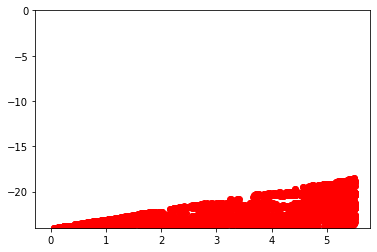

In [58]:
plt.plot(news_view_time_array/3600,news_publish_time_array,'ro')
plt.plot(news_view_time_array/3600,end_time*np.ones(num),'b')
plt.ylim(-24, 0)
# plt.plot(news_view_time_array,start_time*np.ones(num),'g')
plt.show()

In [57]:
all_timestamp = list(news_info['timestamp'])
print(max(news_publish_time_list))
print(max(news_view_time_list))
print(min(all_timestamp))
print(max(all_timestamp))

# 最新发布的新闻也在最早浏览发生前23.8小时（大约浏览0.265小时后）
# 随着浏览时间的提高，浏览新闻的发布时间也在逐渐增长
# 新闻发布时间的峰值与浏览时间具有强线性相关性，基本可以断定用户浏览的新闻基本（98%）都是隔夜发布新闻
# 新闻发布与新闻浏览之间的关系还可以有很多文章和规律，值得细究
# 这部分规律要么是采集数据时系统自带推荐算法的某种规律，要么是用户实际浏览咨询的规律

-18.550555555555555
19831
1462687968
1487503260


i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


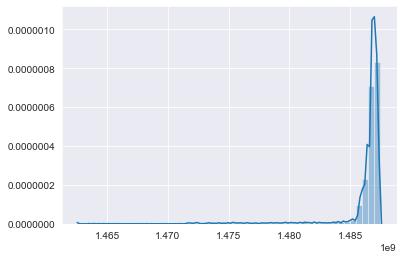

In [65]:
# 第九部分 第二节 备选新闻与训练集新闻的公共部分的发布时间分布柱状图与训练集新闻的发布时间分布图是否一致？？？
import seaborn as sns
train = pd.read_csv('train.csv')
all_news_info = pd.read_csv('all_news_info.csv')
train_news = list(set(list(train['item_id'])))
train_news_publish_time = []
common_news_publish_time = []
for item in train_news:
    sub_info = all_news_info.ix[all_news_info['item_id']==item]
    train_news_publish_time.extend(list(sub_info['timestamp']))
for item in list(c & d):
    sub_info = all_news_info.ix[all_news_info['item_id']==item]
    common_news_publish_time.extend(list(sub_info['timestamp']))

-480.5461111111111
-480.5475
69.58333333333333
69.58333333333333
[ 166.  227.  274.  478. 1062. 1145.  944.  575. 1115. 1961. 2187. 1932.
 2105. 2693. 3598. 5758. 6685. 7065. 4870. 4603. 4861. 5307.  528.]


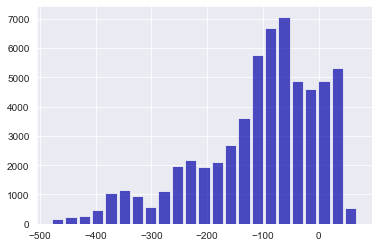

In [137]:
# sns.set_style('darkgrid')
# sns.distplot(train_news_publish_time)
train_news_publish_time.sort(reverse=True)
common_news_publish_time.sort(reverse=True)
plot_data1 = [(i-start_time)/3600 for i in train_news_publish_time]
plot_data2 = [(i-start_time)/3600 for i in common_news_publish_time]
count,_,_ = plt.hist(plot_data1[:60139],bins=23,color='#0504aa',alpha=0.7,rwidth=0.85)
print(min(plot_data1[:60139]))
print(min(plot_data2[:30222]))
print(max(plot_data1[:60139]))
print(max(plot_data2[:30222]))
print(count)

[  27.   49.   34.   71.  117.  172.  190.  196.  494.  953. 1212. 1075.
 1126. 1486. 1887. 2525. 2448. 4031. 2247. 2248. 3006. 4139.  489.]


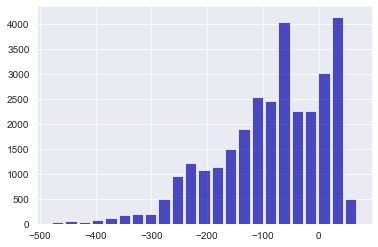

In [139]:
count2,_,_ = plt.hist(plot_data2[:30222],bins=23,color='#0504aa',alpha=0.7,rwidth=0.85)
ratio = []
print(count2)
for i in range(23):
    ratio.append(count2[i]/count[i])

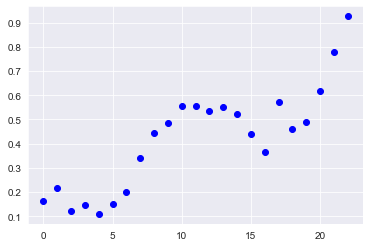

In [142]:
plt.plot(ratio,'bo')
plt.show()

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


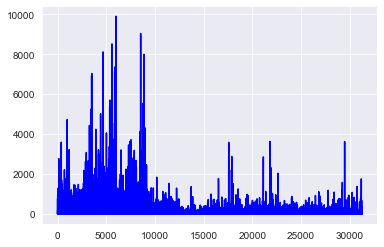

In [98]:
# 很久之前的新闻浏览数目虽然可观，但是在备选集中比例下降显著，同时特别天数的比例显著增高，说明备选集的公共部分是有一定选择依据的！！！
# 第九部分 第三节 探究这个选择依据：直觉与频数有关
train = pd.read_csv('train.csv')
common_news = list(c & d)     # 公共部分的新闻在频数上有要求吗？
frequency_list = []
for item in common_news:
    sub_csv = train.ix[train['item_id']==item]
    sub_frequency = len(list(sub_csv['item_id']))
    frequency_list.append(sub_frequency)

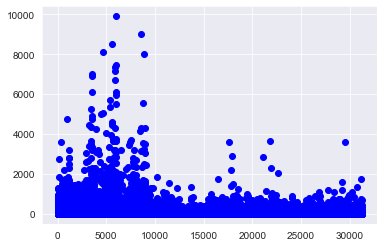

1


In [100]:
plt.plot(frequency_list,'bo')
plt.show()
print(min(frequency_list))

In [101]:
differ_news = list((c & d) ^ d)     # 训练集中没有用到的部分频数有区别吗？
frequency_list2 = []
for item in differ_news:
    sub_csv = train.ix[train['item_id']==item]
    sub_frequency = len(list(sub_csv['item_id']))
    frequency_list2.append(sub_frequency)

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


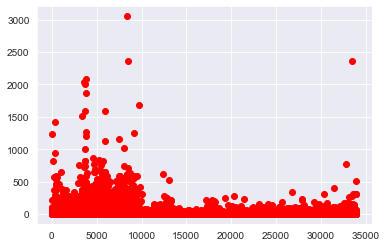

1


In [102]:
plt.plot(frequency_list2,'ro')
plt.show()
print(min(frequency_list2))

0.8207382971434055
406
23


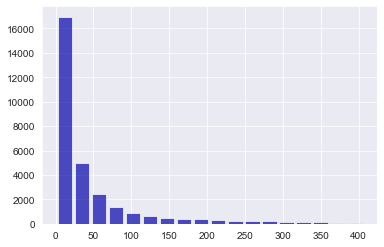

In [119]:
frequency_list.sort()
frequency_list2.sort()
print(sum(frequency_list)/(sum(frequency_list2)+sum(frequency_list)))
plt.hist(frequency_list[:30000],bins=18,color='#0504aa',alpha=0.7,rwidth=0.85)
print(frequency_list[30000])
print(frequency_list2[30000])

(array([3301., 9092., 2486., 3397., 1582., 1758., 1087., 1179.,  821.,
         847.,  658.,  612.,  489.,  428.,  344.,  326.,  304.,  299.,
         246.,  227.,  223.,  221.,   73.]),
 array([ 1.        ,  1.95652174,  2.91304348,  3.86956522,  4.82608696,
         5.7826087 ,  6.73913043,  7.69565217,  8.65217391,  9.60869565,
        10.56521739, 11.52173913, 12.47826087, 13.43478261, 14.39130435,
        15.34782609, 16.30434783, 17.26086957, 18.2173913 , 19.17391304,
        20.13043478, 21.08695652, 22.04347826, 23.        ]),
 <a list of 23 Patch objects>)

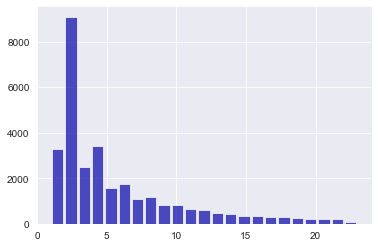

In [114]:
plt.hist(frequency_list2[:30000],bins=23,color='#0504aa',alpha=0.7,rwidth=0.85)

In [146]:
# 经过上述分析，可以确定备选集在频数上一定存在某种要求，但并非简单的取3日内频数大于多少的新闻，因为在公共部分之外的训练集浏览的新闻中
# 依然有高频的浏览新闻，公共部分的备选新闻占了全部浏览记录的82.074%
# 那么这种选取与时间有关系吗？是否是在某一天发布的新闻进行某种指标判断出备选集与非备选集？？？？且慢，新闻的种类是否也是一种指标？

# 第九部分 第四节 探究公共集的新闻种类分布与非公共集的新闻种类分布
all_news_info = pd.read_csv("all_news_info.csv")
cate_id_all = list(set(list(train['cate_id'])))
common_news = list(c & d)
common_cate = []
common_cate_num = []
differ_news = list((c & d) ^ d)
differ_cate = []
differ_cate_num = []
for item in common_news:
    sub_info = all_news_info.ix[all_news_info['item_id']==item]
    common_cate.append(list(sub_info['cate_id'])[0])
for item in differ_news:
    sub_info = all_news_info.ix[all_news_info['item_id']==item]
    differ_cate.append(list(sub_info['cate_id'])[0])
for cate in cate_id_all:
    common_cate_num.append(common_cate.count(cate))
    differ_cate_num.append(differ_cate.count(cate))

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


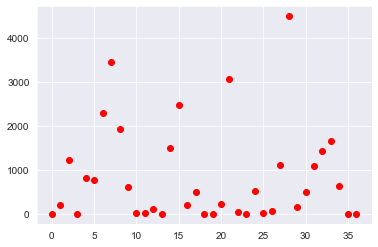

In [147]:
plt.plot(common_cate_num,'ro')

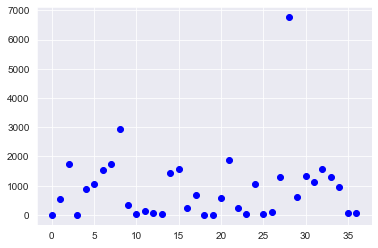

In [148]:
plt.plot(differ_cate_num,'bo')

In [218]:
# 我需要定义一个函数，输入相对浏览新闻起点时间的时间起点和终点，输出这段时间发布新闻中的公共部分新闻的浏览频数和非公共部分的浏览频数（训练集中）
def cal_frequency_of_spantime(start_time,end_time,common_set,differ_set):
    const_time = 1487174400
    start_time = start_time + const_time
    end_time = end_time + const_time
    all_news_info = pd.read_csv("all_news_info.csv")
    publish_news_of_timespan = all_news_info.ix[start_time<=all_news_info['timestamp']]
    publish_news_of_timespan = publish_news_of_timespan.ix[publish_news_of_timespan['timestamp']<=end_time]   
#     print(list(publish_news_of_timespan['timestamp']))
    publish_itemid_of_timespan = set(list(publish_news_of_timespan['item_id']))
#     print(publish_itemid_of_timespan)
    common_list = list(common_set & publish_itemid_of_timespan)
    differ_list = list(differ_set & publish_itemid_of_timespan)
    all_list = list(publish_itemid_of_timespan)
#     print(common_list)
    freq1 = cal_frequency(common_list)
    freq2 = cal_frequency(differ_list)
    freq3 = cal_frequency(all_list)
    return freq1, freq2,freq3

def cal_frequency(news_list):
    freq = []
    train = pd.read_csv("train.csv")
    for item in news_list:
        sub_csv = train.ix[train['item_id']==item]
        sub_freq = len(list(sub_csv['item_id']))
        freq.append(sub_freq)
    return freq

In [219]:
all_news_info['timestamp']
start_time

1487174400

In [222]:
all_freq1=[]
all_freq2=[]
all_freq3=[]
for i in range(23):
    start_time = i*24*3600-20*24*3600
    end_time = (i+1)*24*3600-20*24*3600
    freq1, freq2, freq3 = cal_frequency_of_spantime(start_time, end_time, (c&d), d^(c&d))
    all_freq1.append(freq1)
    all_freq2.append(freq2)
    all_freq3.append(freq3)
    print(sum(freq1),sum(freq2),sum(freq3))

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


520 400 920
1013 495 1508
496 715 1211
1091 1545 2636
5008 9074 14082
13376 17591 30967
10989 8054 19043
3562 2088 5650
12219 3092 15311
34605 5350 39955
52608 5724 58332
67399 5775 73174
41964 5301 47265
66802 7752 74554
106590 10411 117001
93765 24384 118149
109587 46155 155742
274678 42419 317097
260349 68189 328538
757127 151889 909016
482362 116121 598483
263587 43425 307012
1120 0 1120


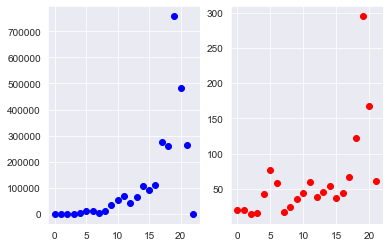

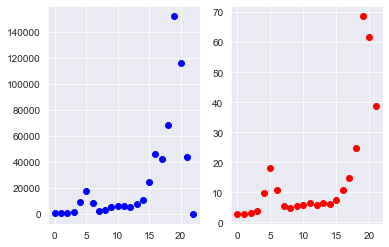

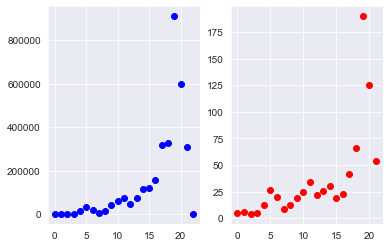

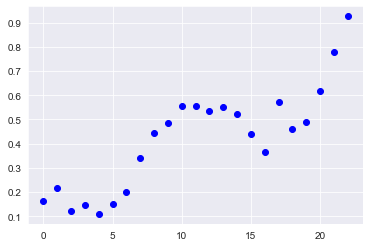

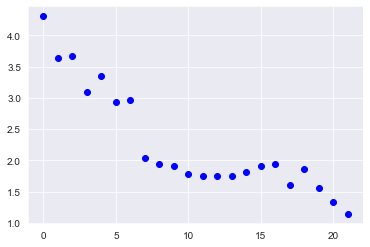

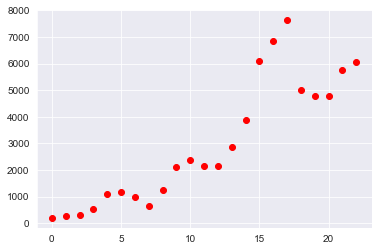

0.9990893372529103
0.9812725547976879
69009


In [248]:
freq1_num = [sum(i) for i in all_freq1]
quality1_num = [sum(i)/len(i) for i in all_freq1]
freq2_num = [sum(i) for i in all_freq2]
quality2_num = [sum(i)/(len(i)+1) for i in all_freq2]
freq3_num = [sum(i) for i in all_freq3]
quality3_num = [sum(i)/(len(i)) for i in all_freq3]
num_list = [len(i) for i in all_freq3]
plt.subplot(121)
plt.plot(freq1_num,'bo')
plt.subplot(122)
plt.plot(quality1_num[:-1],'ro')
plt.show()
plt.subplot(121)
plt.plot(freq2_num,'bo')
plt.subplot(122)
plt.plot(quality2_num[:-1],'ro')
plt.show()
plt.subplot(121)
plt.plot(freq3_num,'bo')
plt.subplot(122)
plt.plot(quality3_num[:-1],'ro')
plt.show()
plt.plot(ratio,'bo')
plt.show()
plt.plot(np.array(quality1_num[:-1])/np.array(quality3_num[:-1]),'bo')
plt.show()
# plt.plot(np.array(quality1_num[:-1])/np.array(quality2_num[:-1]),'bo')
# plt.show()
plt.plot(num_list,'ro')
plt.show()
print(pearsonr(freq1_num[:-1], freq3_num[:-1])[0])
print(pearsonr(quality1_num[:-1], quality3_num[:-1])[0])
print(sum(num_list))

In [223]:
# 说实话，实在是找不到备选集的非公共区域的选择依据是啥，建议换个思路，检测一下按照3日频率高到低排序的方法筛选出来的备选集有什么区别

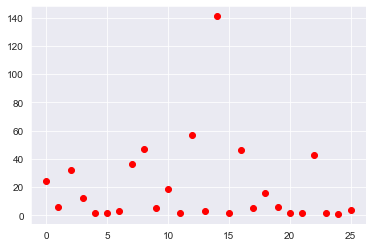

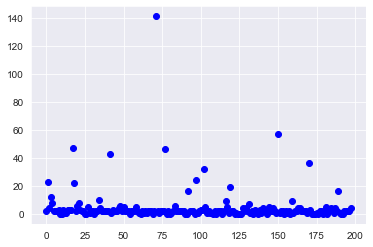

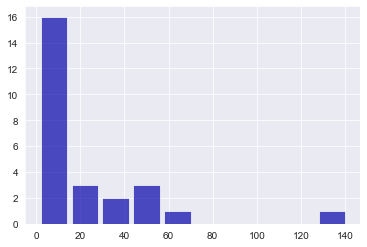

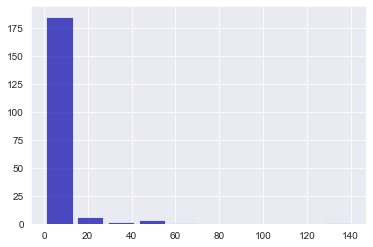

In [259]:
plt.plot(all_freq1[0],'ro')
plt.show()
plt.plot(all_freq3[0],'bo')
plt.show()
plt.hist(all_freq1[0],bins=10,color='#0504aa',alpha=0.7,rwidth=0.85)
plt.show()
plt.hist(all_freq3[0],bins=10,color='#0504aa',alpha=0.7,rwidth=0.85)
plt.show()

In [260]:
# 这里正式开始对协同过滤的效果进行评估，算法设计思路如下：
# 前两天的训练集数据出现的用户作为推荐用户和训练集
# 第三天非训练集用户的浏览记录作为参考集（如果数量太少，则从训练集的用户中拆分，具体后面看）
# 控制协同过滤用户的数目，来进行咨询的协同过滤推荐，利用第三天待推荐用户的实际浏览新闻进行算法效率评估
# 以上

In [270]:
# 正式第一部分 用户拆分

train = pd.read_csv('train.csv')
train_2_days = train.ix[train.action_time<=1487347200]    # 仅取训练集中的前2天数据
train_3th_day = train.ix[train.action_time>1487347200]    # 用于构建当日参考用户-新闻类别矩阵的数据
user_2_days = list(set(list(train_2_days['user_id'])))
print(len(user_2_days))
train_users = user_2_days[:20000]                         # 前20000个人用作训练集
test_users = user_2_days[20000:]                          # 后6908个人用作测试集

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


26908


In [301]:
# 正式第二部分 基于用户相似的推荐函数修正

def user_similar(user):      # user为user_list中的用户
    num = 100
    # train需注意，用2天数据的train
    almost_item_list = list(set(train_2_days.ix[train_2_days.user_id==user].item_id))
    almost_cate_list = list(set(train_2_days.ix[train_2_days.user_id==user].cate_id)) # 当前用户的浏览新闻编号与类别
    user_data = np.array(user_cate_df.ix[train_users.index(user)])/2      # 该用户的浏览新闻频数记录数组除以2，与天数一致
    # 上面的矩阵需要重构，用两天的数据采样生成（user_cate_df）
    def distance(other_row):
        similar = pearsonr(user_data,other_row)[0]                      # 皮尔森相关系数，去中心化的向量余弦夹角
        return similar
    user_pear_list = list(map(distance,test_user_cate_df.values))       # 测试集上的每一行进行距离计算
    # 测试集的统计数据也需要重构，因为测试集的用户变了
    user_dist_list = list(0.5+0.5*np.array(user_pear_list))             # 进行了偏置与缩放（这个值最终到了0~1）
    # 负相关被认为是某种距离0，可以理解为两个人的喜好完全相反，那么在推荐上就会完全不同
    user_BX_item_series = pd.Series()
    weight_list = []
    for i in range(num):
        max_dist = max(user_dist_list)                            # 最远的用户距离（但是是最相似的？？？？）
        max_similar_test_user_items = useritem_list_in_test[user_dist_list.index(max_dist)] # 最相似的测试用户浏览新闻编号
        
        # 这个测试集上用户每个浏览了什么也要保留，而且顺序一致
        
        user_dist_list[user_dist_list.index(max_dist)] = 0        # 把这个距离置为0
        weight = max_dist                     # 把这个距离设置为这个用户的权重
        weight_list.append(max_dist)          # 相似度前num的权重列表

        test_user_series = pd.Series(np.ones(len(max_similar_test_user_items)),index=max_similar_test_user_items) # 字典 编号→1
        a = pd.concat([user_BX_item_series,test_user_series],axis=1) # 按列拼接，初始时就是后者，即行对齐
        a = a.fillna(0)                        # 用0填充缺失值，错位就会产生NaN
        user_BX_item_series = a[0]+a[1]*weight # 新的BX列为a的前两列权重和，然后放在新的test列前面
    # print(user_BX_item_series)
    # 循环完成后得到user_BX_item_series为该用户的备选推荐集
    user_BX_item_list = list(user_BX_item_series.index) # 迭代后的BX列的编号(应该是前100接近的测试用户浏览新闻编号的不重复行)
    user_BX_score_list = list(user_BX_item_series.values)# 与编号对应的某种权重和，越大越好？
    # 推荐
    times = 0
    s = ''
    while times<5:
        if max(user_BX_score_list)==0:
            break
        max_score = max(user_BX_score_list)                                # 先取最大分数值
        max_item = user_BX_item_list[user_BX_score_list.index(max_score)]  # 取最大分数值对应的新闻编号
        user_BX_score_list[user_BX_score_list.index(max_score)] = 0        # 把这个最大值设置为0
        if max_item not in almost_item_list:                              # 如果这个最大分数的新闻编号不在当前用户的训练集中的浏览编号中
            if int(max_item) in BX_item_set:                               # 如果这个最大分数的新闻编号在待推荐新闻编号中
                # 待推荐新闻也需要重新设计，变成参考用户的预测日的浏览新闻（这个方法应该有更多空间）
                item_cate = list(all_news_info[all_news_info.item_id==int(max_item)].cate_id)[0]  # 那么它的类别可以在待推荐新闻中检索到
                if item_cate in almost_cate_list:                          # 如果它的类别在当前用户的训练集中的浏览类别中
                    times += 1                                             # 不在训练集中的新类别如何评价吸引力？
                    s += ' '+str(max_item)                                      # 推荐这个新闻
    result = user+ ',' + s[1:] + '\n'
    
    actual_items = train_3th_day.ix[train_3th_day.user_id==user]
    actual_items = set(list(actual_items['item_id']))                      # 一并输出在第三天用户真正浏览的新闻
    return result, actual_items

In [273]:
# 正式第三部分 user_cate_df 与 test_user_cate_df生成CSV重构

num = 100                              # 预测用户数量，这个方法下的用户独立，仅仅与参考用户有关
sub_train_users = train_users[:num]    # 定义局部用户数量
def user_cateid_matrix_generation(train_2_days, sub_train_users, ID): # 该函数生成在指定数据集下的指定用户的（用户—种类矩阵并导入CSV）
    all_news_info = pd.read_csv('all_news_info.csv')   # 读取所有新闻数据75213×3，新闻唯一编号，划分类别，时间戳（发布时间？）
    cate_id = all_news_info.cate_id
    cate_id_list = list(set(cate_id))                  # 利用集合性质去掉重复元素，构成纯划分类别
    def cal_eve_user(user):                            # 定义函数，计算每一个用户的？？？
        user_train = train_2_days.ix[train_2_days.user_id==user]     # 训练集的用户ID为自变量输入的所有行？？？
        user_items = list(set(user_train.item_id))     # 该用户行为行的所有浏览新闻编号，同样集合消重（可能存在反复浏览）
        def find_itemcate(item):                       # 定义内部函数，寻找新闻编号→类别
            if item not in list(all_news_info.item_id): # 对于该新闻编号，若不在所有新闻的编号总列中，则直接返回
                return
            onepart_item_cate = list(all_news_info.ix[all_news_info.item_id==item].cate_id)[0] # 对于该新闻编号的所属类别，取其中元素
            return onepart_item_cate                    # 返回该物品编号的类别
        onepart_user_cate_list = list(map(find_itemcate,user_items))# 对该用户的所有浏览新闻编号进行类别检索
        auser_cate_num_list = list(map(lambda cate:onepart_user_cate_list.count(cate),cate_id_list))# 对该用户的浏览新闻类别进行数量统计
        return auser_cate_num_list

    all_user_cate = list(map(cal_eve_user,sub_train_users))# 对指定数量的用户进行上述函数操作
    user_cate_df = pd.DataFrame(all_user_cate)
    user_cate_df.index = sub_train_users
    user_cate_df.columns = cate_id_list

    user_cate_df.to_csv(ID+'.csv',index=False) # 数据转化为CSV，并且将index行隐藏，得到每个用户的浏览新闻类别统计矩阵（28501×38）
    print("输出完成")

ID1 = 'lhc1'
ID2 = 'lhc2'
user_cateid_matrix_generation(train_2_days, sub_train_users, ID1)   # 调用函数，生成user_cate_df
user_cateid_matrix_generation(train_3th_day, test_users, ID2)      # 调用函数，生成user_cate_df

user_cate_df = pd.read_csv(ID1+'.csv')                              # 载入待预测用户-新闻类别矩阵
test_user_cate_df = pd.read_csv(ID2+'.csv')                         # 载入参考用户-新闻类别矩阵

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


输出完成
输出完成


In [280]:
# 正式第四部分 重构BX_item_set 与 useritem_list_in_test由参考用户的浏览新闻导出

BX_item_set = set()
useritem_list_in_test = []
BX_item_list = []
for user in test_users:
    his_info = train_3th_day.ix[train_3th_day.user_id==user]
    his_view_item = list(set(list(his_info['item_id'])))
    useritem_list_in_test.append(his_view_item)
    BX_item_list.extend(his_view_item)
BX_item_set = set(BX_item_list)

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [308]:
# 正式第五部分 运行并测试算法

ID3='lhc3'
user_cateid_matrix_generation(train_2_days, train_users[:1000], ID3)   # 调用函数，生成user_cate_df
for i in range(1000):
    user = train_users[i]
    predict, actual = user_similar(user)
    print(len(set(predict) & actual))

# 100个人全是空集，我接受不了！！！！！！！！！！！

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


输出完成


i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:55: Futu

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


KeyError: 100

In [309]:
user_cate_df = pd.read_csv(ID3+'.csv')                              # 载入待预测用户-新闻类别矩阵
for i in range(1000):
    user = train_users[i]
    predict, actual = user_similar(user)
    print(len(set(predict) & actual))

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:55: Futu

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [327]:
a=re.compile(' ').split(predict)
b=re.compile(',').split(a[0])
b=b[1:]
b.extend(a[1:])
b[-1] =b[-1][:-1]
b = set([int(i) for i in b])
print(b)

{549536, 549608, 549609, 550192, 550039}


In [311]:
print(actual)

{474597, 536623, 461168, 552687, 553717, 553014, 532955, 502361, 543002, 519739, 551996, 552061}


In [329]:
index = 0
for i in range(1000):
    user = train_users[i]
    predict, actual = user_similar(user)
    a=re.compile(' ').split(predict)
    b=re.compile(',').split(a[0])
    b=b[1:]
    b.extend(a[1:])
    b[-1] =b[-1][:-1]
    b = [int(i) for i in b]
    ap_value = ap5(b, actual)
    index = index + ap_value
#     print(len(b & actual))
print(index)

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:55: Futu

574


In [374]:
def ap5(a,b):
    common_list = {}
    common_list = list(set(a) & b)
    if (len(common_list)==0):
        return 0
    else:
        index = [a.index(item) for item in common_list]
        index.sort()
        print(index)
        c = min([len(a),len(b)])
        ap_value = [(i+1)/(index[i]+1)/c for i in range(len(index))]
        ap_value = sum(ap_value)
        return ap_value

In [377]:
index = 0
for i in range(100):
    user = train_users[i]
    predict, actual = user_similar(user)
    a=re.compile(' ').split(predict)
    b=re.compile(',').split(a[0])
    b=b[1:]
    b.extend(a[1:])
    b[-1] =b[-1][:-1]
    b = [int(i) for i in b]
    ap_value = ap5(b, actual)
    index = index + ap_value
print(index/100)

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:55: Futu

[0]
[4]
[1, 2]
[0]
[2]
[0]
[2]
[0]
[3]
[0, 1, 2, 3, 4]
[1]
[4]
[1, 2]
[0]
[0]
[0, 1, 2, 3, 4]
[0]
[1, 4]
[2, 3]
[0, 3, 4]
[2]
[1]
[0, 1]
[0]
[0]
[1]
[2, 4]
[2]
[0]
[3]
0.06526666666666667


In [378]:
ap5([1,2,3,6,4,5],{1,2,3,4,5})

[0, 1, 2, 4, 5]


0.9266666666666667

In [375]:
index = 0
for i in range(10):
    user = train_users[i]
    predict, actual = user_similar(user)
    a=re.compile(' ').split(predict)
    b=re.compile(',').split(a[0])
    b=b[1:]
    b.extend(a[1:])
    b[-1] =b[-1][:-1]
    b = [int(i) for i in b]
    print(len(set(b) & actual))
    print(ap5(b, actual))
    print(b, actual)

i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
i:\机器人小组专用\深度学习处理图像\python\lib\site-packages\ipykernel_launcher.py:55: Futu

0
0
[549608, 550216, 550319, 549609, 542597] {540321, 543874, 552876, 552461, 550958, 553264, 552721, 519155, 554931, 553269, 534043, 555961, 552826, 545883}
0
0
[550192, 549608, 542113, 550039, 550001] {513943}
0
0
[550192, 542113, 549608, 550129, 550351] {552326, 551431, 429064, 552329, 471314, 556051, 556819, 552858, 551974, 490284, 506928, 472241, 555826, 551485, 471360, 479953, 489943, 538586, 521562, 484189, 552802, 552824, 555773}
0
0
[549608, 550192, 550039, 550001, 549609] {546816, 488832, 479367, 511112, 538249, 479371, 555276, 502167, 548120, 475033, 554652, 547875, 548395, 470831, 489011, 548537, 555194, 473662, 541122, 541891, 542277, 553286, 542293, 488932, 474597, 555750, 489325, 542703, 554611, 548340, 523772}
1
[0]
0.2
[532955, 531395, 542524, 541585, 532394] {273540, 549509, 554885, 491527, 456073, 540172, 459412, 520468, 529942, 488099, 550074, 506428, 507582, 506434, 467653, 524230, 424137, 524111, 555087, 532824, 418394, 532955, 503396, 520421, 524136, 409578, 4241